In [1]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys
import uproot
import numpy as np
import awkward
import math
import numba

from matplotlib import pyplot as plt
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
#from prettytable import PrettyTable
import collections
from collections import OrderedDict
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []


Welcome to JupyROOT 6.16/00


In [2]:
out_dir = '/nfshome/jmao/cms-llp/plots/20190606/'

# Single Gaussian

0 0.24


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime240ps.png has been created


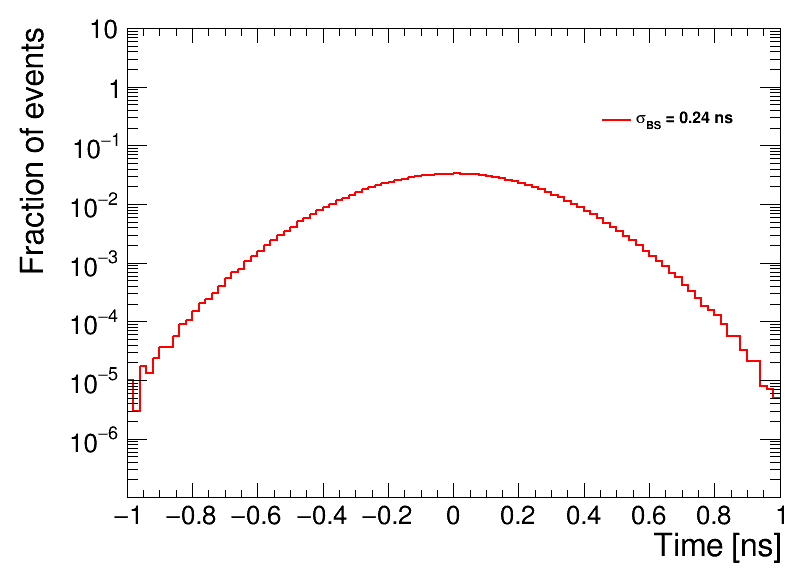

In [4]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.24]

hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.random.normal(0,sig,1000000)
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-1,1])
    hs[i].SetLineColor(std_color_list[i+1])
    hs[i].SetMarkerColor(std_color_list[i+1])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e7)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime240ps.png')


0 0.193


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime193ps.png has been created


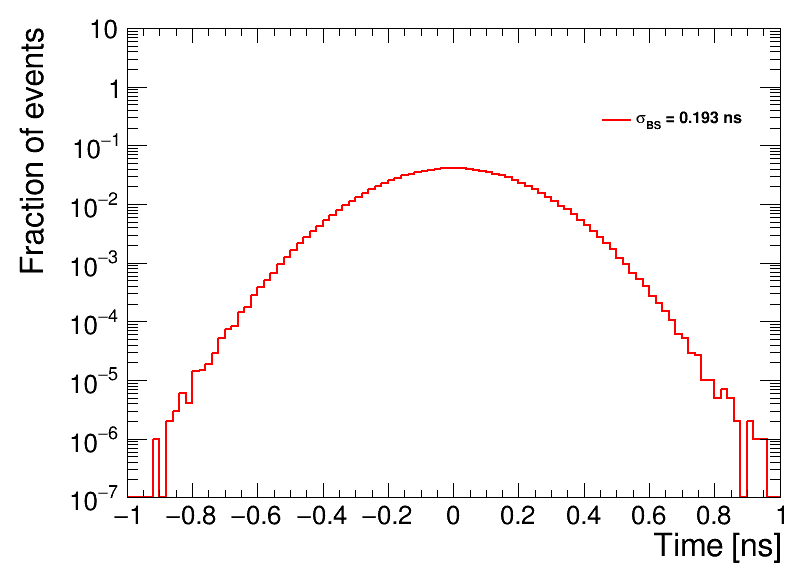

In [5]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.193]

hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.random.normal(0,sig,1000000)
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-1,1])
    hs[i].SetLineColor(std_color_list[i+1])
    hs[i].SetMarkerColor(std_color_list[i+1])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e7)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime193ps.png')


0 0.22


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime220ps.png has been created


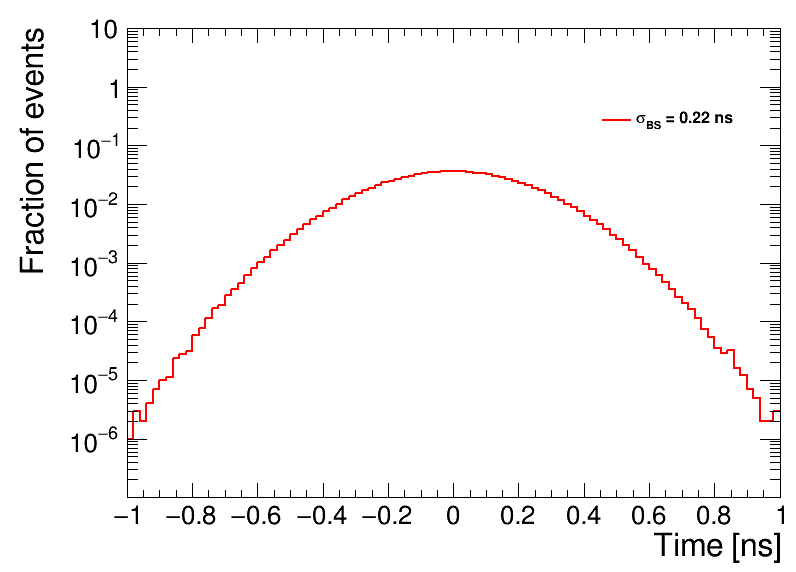

In [3]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.22]

hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.random.normal(0,sig,1000000)
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-1,1])
    hs[i].SetLineColor(std_color_list[i+1])
    hs[i].SetMarkerColor(std_color_list[i+1])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e7)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime220ps.png')


In [4]:
i = 0
Power_1j = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
# t_cuts = [0.2,0.4,0.6,0.8,1.0]
# t_cuts = [0.,1.,2.,3.,4.]
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.5,0.6,0.8,1.,2.,3.,4.]
N = 1e6
# print(t_cuts)
for j,sig in enumerate(sigma):
#         print(j,sig)

    t = np.random.normal(0,sig,int(N))
    Power_rej_1j = []
    
#     num = len(t_cuts)+j-3
    num = len(t_cuts)
    print(j,sig,num)
    for p in range(0,num):
        q = t_cuts[p]
#         print(j,sig,p,q)

        tcut_string = np.logical_and( t > q, t)

        tcutted_t = t[tcut_string]

        Nsel = np.shape(tcutted_t)[0]
#         print(q,Nsel)
        if Nsel==0:
            break
#         Nrej = 1.*N - 1.*Nsel
        Prej_j = 1.0*N/Nsel
        Power_rej_1j.append(Prej_j)
        print('t cut: ',q, 'rej power: ',Prej_j)

    Power_rej_1j = np.array(Power_rej_1j) 
#     print('Rejection power',Power_rej_1j)

    Power_1j.append(Power_rej_1j)


    
Power_1j = np.array(Power_1j)
print(Power_1j)


0 0.22 19
t cut:  -5.0 rej power:  1.0
t cut:  -4.0 rej power:  1.0
t cut:  -3.0 rej power:  1.0
t cut:  -2.0 rej power:  1.0
t cut:  -1.0 rej power:  1.000002000004
t cut:  -0.8 rej power:  1.0001490222043083
t cut:  -0.6 rej power:  1.0032907938036761
t cut:  -0.4 rej power:  1.0360750988674663
t cut:  -0.2 rej power:  1.2217500836898807
t cut:  0.0 rej power:  2.002607394828066
t cut:  0.2 rej power:  5.528374381513116
t cut:  0.4 rej power:  29.29372821278964
t cut:  0.5 rej power:  87.71160424524165
t cut:  0.6 rej power:  325.2032520325203
t cut:  0.8 rej power:  6250.0
t cut:  1.0 rej power:  1000000.0
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000200e+00 1.00014902e+00 1.00329079e+00 1.03607510e+00
  1.22175008e+00 2.00260739e+00 5.52837438e+00 2.92937282e+01
  8.77116042e+01 3.25203252e+02 6.25000000e+03 1.00000000e+06]]


0 0.22


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime220ps.png has been created


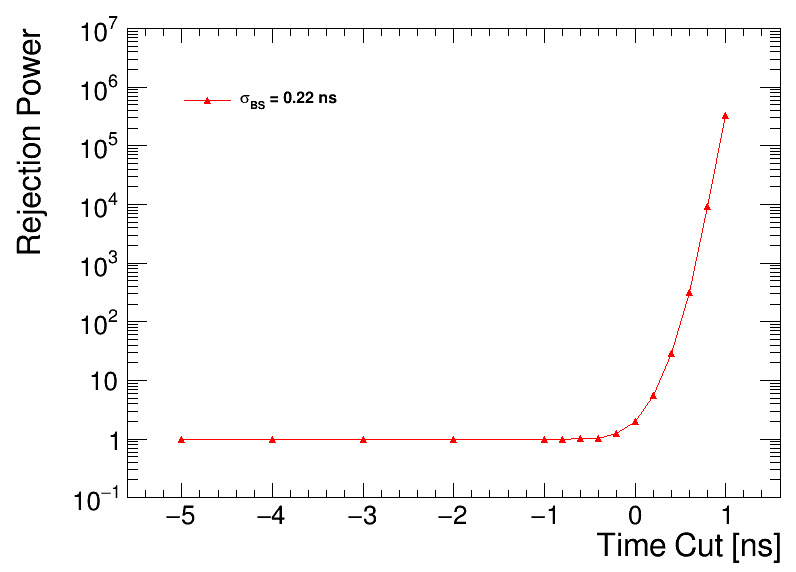

In [5]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 

 
    power = np.array(Power_i) 
    #print num, t_cuts, power
    num = len(power)
#     num = len(t_cuts)+i-4
    hrej[i] = rt.TGraph(num , t_cuts, power)

    hrej[i].SetLineColor(std_color_list[i+1])
    hrej[i].SetMarkerColor(std_color_list[i+1])
    hrej[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[i],'#sigma_{BS} = '+str(sig)+' ns')

    hrej[i].SetTitle( 'Rejection Power' )
    hrej[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej[i].GetYaxis().SetTitle( 'Rejection Power' )
#     if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
    hrej[i].Draw('ALPsame')
#     else:
#         hrej[i].Draw('LPsame')
    
#     i += 1



leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime220ps.png')


In [6]:
i = 0
Power_1j = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
t_cuts = [0.2,0.4,0.6,0.8,1.0]
# t_cuts = [0.,1.,2.,3.,4.]
# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.]
N = 1e6
# print(t_cuts)
for j,sig in enumerate(sigma):
#         print(j,sig)

    t = np.random.normal(0,sig,int(N))
    Power_rej_1j = []
    
#     num = len(t_cuts)+j-3
    num = len(t_cuts)
    print(j,sig,num)
    for p in range(0,num):
        q = t_cuts[p]
#         print(j,sig,p,q)

        tcut_string = np.logical_and( t > q, t)

        tcutted_t = t[tcut_string]

        Nsel = np.shape(tcutted_t)[0]
#         print(q,Nsel)
        if Nsel==0:
            break
#         Nrej = 1.*N - 1.*Nsel
        Prej_j = 1.0*N/Nsel
        Power_rej_1j.append(Prej_j)
        print('t cut: ',q, 'rej power: ',Prej_j)

    Power_rej_1j = np.array(Power_rej_1j) 
#     print('Rejection power',Power_rej_1j)

    Power_1j.append(Power_rej_1j)


    
Power_1j = np.array(Power_1j)
print(Power_1j)


0 0.193 5
t cut:  0.2 rej power:  6.640414893122522
t cut:  0.4 rej power:  51.93725979017347
t cut:  0.6 rej power:  1069.51871657754
t cut:  0.8 rej power:  76923.07692307692
[[6.64041489e+00 5.19372598e+01 1.06951872e+03 7.69230769e+04]]


0 0.24


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime240ps.png has been created


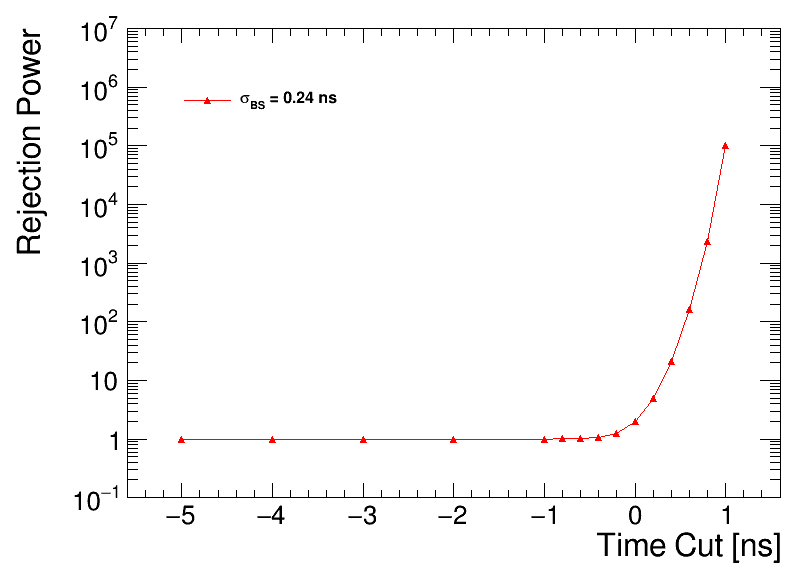

In [11]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 

 
    power = np.array(Power_i) 
    #print num, t_cuts, power
    num = len(power)
#     num = len(t_cuts)+i-4
    hrej[i] = rt.TGraph(num , t_cuts, power)

    hrej[i].SetLineColor(std_color_list[i+1])
    hrej[i].SetMarkerColor(std_color_list[i+1])
    hrej[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[i],'#sigma_{BS} = '+str(sig)+' ns')

    hrej[i].SetTitle( 'Rejection Power' )
    hrej[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej[i].GetYaxis().SetTitle( 'Rejection Power' )
#     if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
    hrej[i].Draw('ALPsame')
#     else:
#         hrej[i].Draw('LPsame')
    
#     i += 1



leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime240ps.png')


0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime.pdf has been created


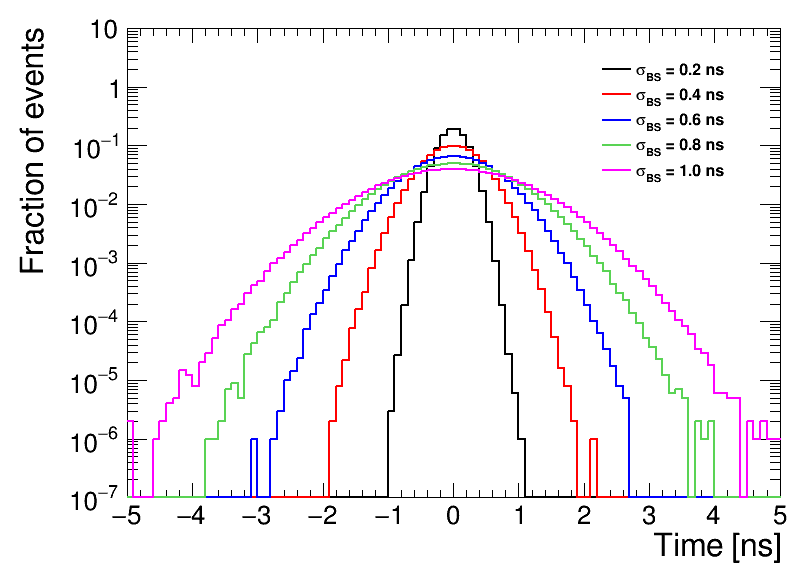

In [18]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.random.normal(0,sig,1000000)
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs[i].SetLineColor(std_color_list[i])
    hs[i].SetMarkerColor(std_color_list[i])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e7)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime.png')
c.SaveAs(out_dir+'SmearTime.pdf')

In [19]:
i = 0
Power_1j = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
# t_cuts = [0.2,0.4,0.6,0.8]
# t_cuts = [0.,1.,2.,3.,4.]
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.]
N = 1e6
print(t_cuts)
for j,sig in enumerate(sigma):
#         print(j,sig)

    t = np.random.normal(0,sig,int(N))
    Power_rej_1j = []
    
#     num = len(t_cuts)+j-3
    num = len(t_cuts)
#     print(j,sig,num)
    for p in range(0,num):
        q = t_cuts[p]
#         print(j,sig,p,q)

        tcut_string = np.logical_and( t > q, t)

        tcutted_t = t[tcut_string]

        Nsel = np.shape(tcutted_t)[0]
#         print(q,Nsel)
        if Nsel==0:
            break
#         Nrej = 1.*N - 1.*Nsel
        Prej_j = 1.0*N/Nsel
        Power_rej_1j.append(Prej_j)

    Power_rej_1j = np.array(Power_rej_1j) 
#     print('Rejection power',Power_rej_1j)

    Power_1j.append(Power_rej_1j)


    
Power_1j = np.array(Power_1j)
print(Power_1j)


[-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0]
[array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00003000e+00, 1.00131874e+00, 1.02308803e+00,
       1.18834142e+00, 1.99883268e+00, 6.30656198e+00, 4.40315266e+01,
       6.98324022e+02, 2.70270270e+04])
 array([  1.        ,   1.        ,   1.        ,   1.000002  ,
         1.00626197,   1.02314769,   1.07174474,   1.18930529,
         1.44673833,   2.00083235,   3.2402937 ,   6.30445473,
        14.98958224,  44.08199251, 160.1537476 ])
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00040116e+00,
       1.05048417e+00, 1.10109482e+00, 1.18924589e+00, 1.33841216e+00,
       1.58683561e+00, 2.00275178e+00, 2.70402548e+00, 3.96229480e+00,
       6.32155207e+00, 1.10138223e+01, 2.10828133e+01, 2.27272727e+03,
       1.00000000e+06])
 array([1.00000000e+00, 1.00000000e+00, 1.00008901e+00, 1.00630045e+00,
       1.11874593e+00, 1.

4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime.pdf has been created


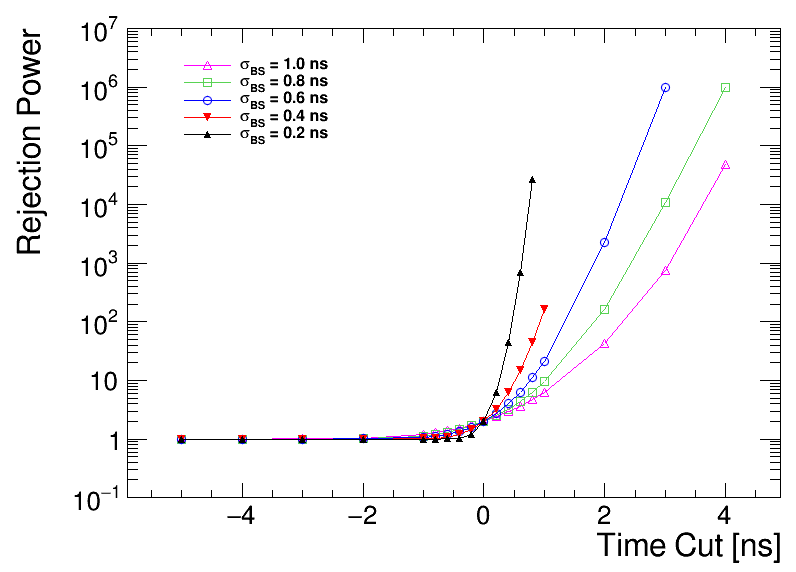

In [20]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 

 
    power = np.array(Power_i) 
    #print num, t_cuts, power
    num = len(power)
#     num = len(t_cuts)+i-4
    hrej[i] = rt.TGraph(num , t_cuts, power)

    hrej[i].SetLineColor(std_color_list[i])
    hrej[i].SetMarkerColor(std_color_list[i])
    hrej[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[i],'#sigma_{BS} = '+str(sig)+' ns')

    hrej[i].SetTitle( 'Rejection Power' )
    hrej[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej[i].GetYaxis().SetTitle( 'Rejection Power' )
    if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej[i].Draw('ALPsame')
    else:
        hrej[i].Draw('LPsame')
    
#     i += 1



leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime.pdf')


# Double Gaussian

0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_DoubleGaus.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_DoubleGaus.pdf has been created


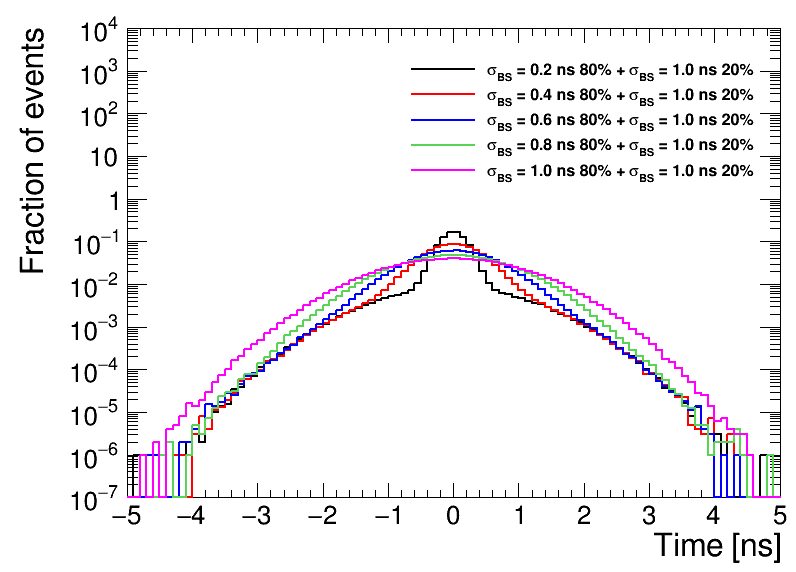

In [5]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.5,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]
N= 1e6
hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , axis=None)
#     SmearTime = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , 
#     SmearTime = 0.8*np.random.normal(0,sig,int(N))+0.2*np.random.normal(0,1,int(N))
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs[i].SetLineColor(std_color_list[i])
    hs[i].SetMarkerColor(std_color_list[i])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e10)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_DoubleGaus.png')
c.SaveAs(out_dir+'SmearTime_DoubleGaus.pdf')

In [10]:
i = 0
Power_1j_v2 = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
# t_cuts = [0.2,0.4,0.6,0.8,1]
t_cuts = [0.,1.,2.,3.,4.]
# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.]
N = 1e6
print(t_cuts)
for j,sig in enumerate(sigma):
#         print(j,sig)

    t = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , axis=None)
#     t = 0.8*np.random.normal(0,sig,int(N))+ 0.2*np.random.normal(0,1.0,int(N))
    Power_rej_1j = []
    
    num = len(t_cuts)
#     num = len(t_cuts)+j-5
#     print(j,sig,num)
    for p in range(0,num):
        q = t_cuts[p]
#         print(j,sig,p,q)

        tcut_string = np.logical_and( t > q, t)

        tcutted_t = t[tcut_string]

        Nsel = np.shape(tcutted_t)[0]
#         print(q,Nsel)
#         Nrej = 1.*N - 1.*Nsel
        if Nsel==0:
            break
        Prej_j = 1.0*N/Nsel
        Power_rej_1j.append(Prej_j)

    Power_rej_1j = np.array(Power_rej_1j) 
#     print('Rejection power',Power_rej_1j)

    Power_1j_v2.append(Power_rej_1j)


    
Power_1j_v2 = np.array(Power_1j_v2)
print(Power_1j_v2)


[0.0, 1.0, 2.0, 3.0, 4.0]
[[2.00471911e+00 3.16165544e+01 2.19635405e+02 3.50877193e+03
  1.42857143e+05]
 [2.00241090e+00 2.72903419e+01 2.24164985e+02 4.27350427e+03
  3.33333333e+05]
 [2.00123276e+00 1.43174171e+01 2.02963264e+02 3.77358491e+03
  1.66666667e+05]
 [2.00277986e+00 8.63983135e+00 1.04079933e+02 2.94117647e+03
  1.42857143e+05]
 [1.99946414e+00 6.30664152e+00 4.34669217e+01 7.30460190e+02
  3.84615385e+04]]


4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime_DoubleGaus.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime_DoubleGaus.pdf has been created


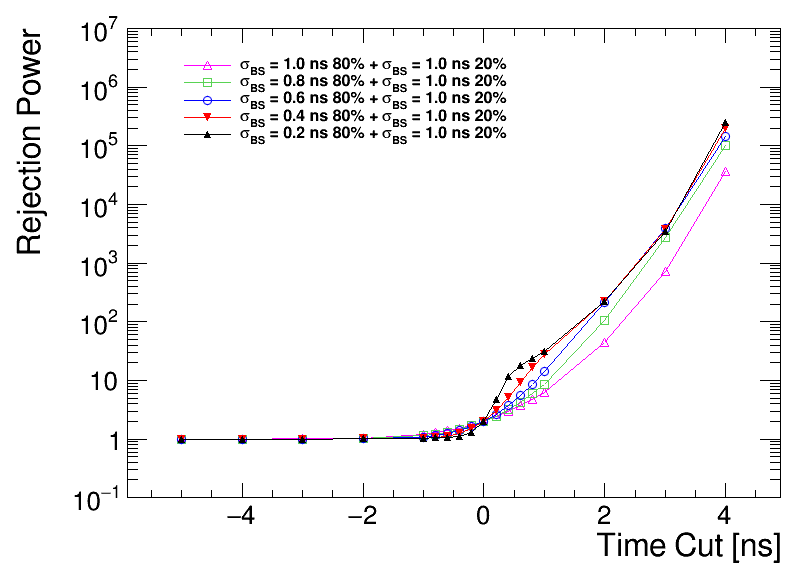

In [72]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j_v2[i] 

 
    power = np.array(Power_i) 
    #print num, t_cuts, power
    num = len(power)
#     num = len(t_cuts)+i-5
    hrej[i] = rt.TGraph(num , t_cuts, power)

    hrej[i].SetLineColor(std_color_list[i])
    hrej[i].SetMarkerColor(std_color_list[i])
    hrej[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')

    hrej[i].SetTitle( 'Rejection Power' )
    hrej[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej[i].GetYaxis().SetTitle( 'Rejection Power' )
    if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej[i].Draw('ALPsame')
    else:
        hrej[i].Draw('LPsame')
    
#     i += 1



leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime_DoubleGaus.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime_DoubleGaus.pdf')


0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_DoubleGaus600.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_DoubleGaus600.pdf has been created


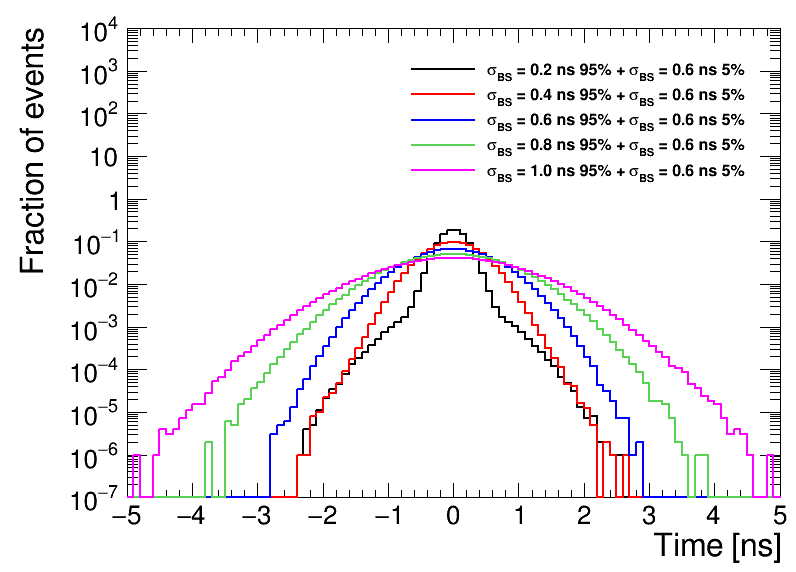

In [6]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.5,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]
N= 1e6
hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.concatenate( (np.random.normal(0,sig,int(0.95*N)),np.random.normal(0,0.6,int(0.05*N))) , axis=None)
#     SmearTime = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , 
#     SmearTime = 0.8*np.random.normal(0,sig,int(N))+0.2*np.random.normal(0,1,int(N))
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs[i].SetLineColor(std_color_list[i])
    hs[i].SetMarkerColor(std_color_list[i])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e10)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns 95% + #sigma_{BS} = 0.6 ns 5%')

    hs[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_DoubleGaus600.png')
c.SaveAs(out_dir+'SmearTime_DoubleGaus600.pdf')

In [14]:
i = 0
Power_1j_v2 = []

# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
# t_cuts = [0.2,0.4,0.6,0.8]
t_cuts = [0.,1.,2.,3.,4.]
# t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.]
N = 1e6
print(t_cuts)
for j,sig in enumerate(sigma):
#         print(j,sig)

    t = np.concatenate( (np.random.normal(0,sig,int(0.96*N)),np.random.normal(0,1.,int(0.05*N))) , axis=None)
#     t = 0.8*np.random.normal(0,sig,int(N))+ 0.2*np.random.normal(0,1.0,int(N))
    Power_rej_1j = []
    
    num = len(t_cuts)
#     num = len(t_cuts)+j-5
#     print(j,sig,num)
    for p in range(0,num):
        q = t_cuts[p]
#         print(j,sig,p,q)

        tcut_string = np.logical_and( t > q, t)

        tcutted_t = t[tcut_string]

        Nsel = np.shape(tcutted_t)[0]
#         print(q,Nsel)
#         Nrej = 1.*N - 1.*Nsel
        if Nsel==0:
            break
        Prej_j = 1.0*N/Nsel
        Power_rej_1j.append(Prej_j)

    Power_rej_1j = np.array(Power_rej_1j) 
#     print('Rejection power',Power_rej_1j)

    Power_1j_v2.append(Power_rej_1j)


    
Power_1j_v2 = np.array(Power_1j_v2)
print(Power_1j_v2)


[0.0, 1.0, 2.0, 3.0, 4.0]
[array([1.97973935e+00, 1.26087505e+02, 8.79507476e+02, 1.49253731e+04,
       1.00000000e+06])
 array([1.98441047e+00, 7.20149791e+01, 8.74890639e+02, 1.69491525e+04,
       3.33333333e+05])
 array([1.98110423e+00, 1.85787274e+01, 6.47249191e+02, 1.29870130e+04])
 array([1.97789113e+00, 9.11768192e+00, 1.38427464e+02, 6.45161290e+03,
       5.00000000e+05])
 array([1.97906545e+00, 6.20929034e+00, 4.31629834e+01, 7.41289844e+02,
       2.50000000e+04])]


4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime_DoubleGaus600ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime_DoubleGaus600ps.pdf has been created


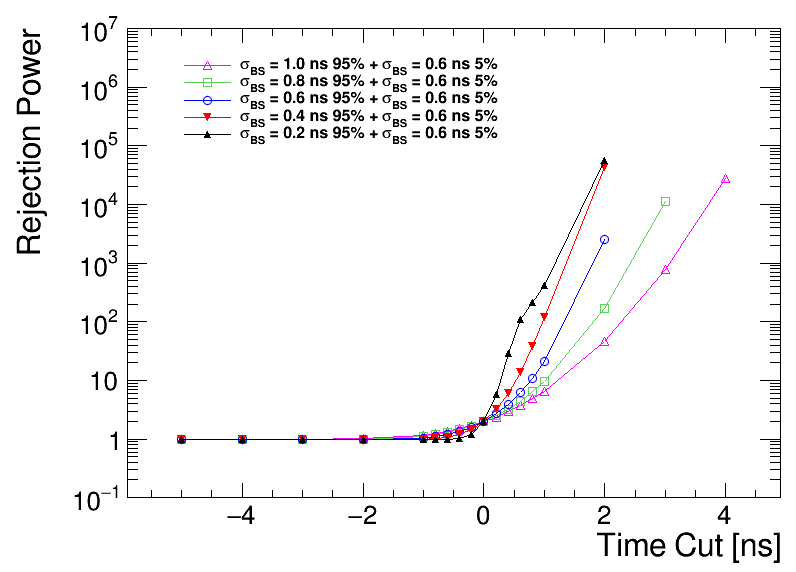

In [8]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j_v2[i] 

 
    power = np.array(Power_i) 
    #print num, t_cuts, power
    num = len(power)
#     num = len(t_cuts)+i-5
    hrej[i] = rt.TGraph(num , t_cuts, power)

    hrej[i].SetLineColor(std_color_list[i])
    hrej[i].SetMarkerColor(std_color_list[i])
    hrej[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)


    leg.SetBorderSize(0)
    leg.AddEntry(hrej[i],'#sigma_{BS} = '+str(sig)+' ns 95% + #sigma_{BS} = 0.6 ns 5%')

    hrej[i].SetTitle( 'Rejection Power' )
    hrej[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej[i].GetYaxis().SetTitle( 'Rejection Power' )
    if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej[i].Draw('ALPsame')
    else:
        hrej[i].Draw('LPsame')
    
#     i += 1



leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime_DoubleGaus600ps.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime_DoubleGaus600ps.pdf')


# Time Distribution Plots

0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: 0.2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 1.0 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma200ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma200ps.pdf has been created


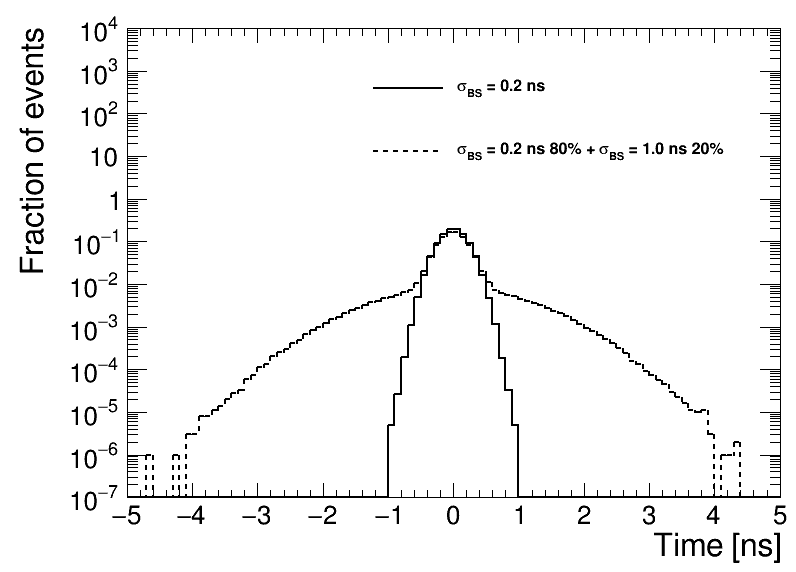

In [65]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.45,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs1 ={}
hs2 ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime1 = np.random.normal(0,sig,int(N))
    t1 = SmearTime1
    hs1[i] = create_TH1D( t1, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs1[i].SetLineColor(std_color_list[i])
    hs1[i].SetMarkerColor(std_color_list[i])
    hs1[i].GetYaxis().SetRangeUser(1e-1, 1e10)

    
    SmearTime2 = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , axis=None)
#     print(SmearTime2.shape)
#     SmearTime2 = 0.8*np.random.normal(0,sig,int(N))+0.2*np.random.normal(0,1,int(N))
    t2 = SmearTime2
    hs2[i] = create_TH1D( t2, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs2[i].SetLineStyle(7)
#     hs2[i].SetFillStyle(3436)
#     hs2[i].SetFillColor(std_color_list[i])
    hs2[i].SetLineColor(std_color_list[i])
    hs2[i].SetMarkerColor(std_color_list[i])
    hs2[i].GetYaxis().SetRangeUser(1e-1, 1e10)
    
    if i==0:

        leg.AddEntry(hs1[i],'#sigma_{BS} = '+str(sig)+' ns')

#         hs1[i].Draw('ALPsame')
        hs1[i].DrawNormalized('same')

#     if i==3:
    
        leg.AddEntry(hs2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')

#         hs2[i].Draw('LPsame')
        hs2[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_sigma200ps.png')
c.SaveAs(out_dir+'SmearTime_sigma200ps.pdf')

0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: 0.2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 1.0 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma400ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma400ps.pdf has been created


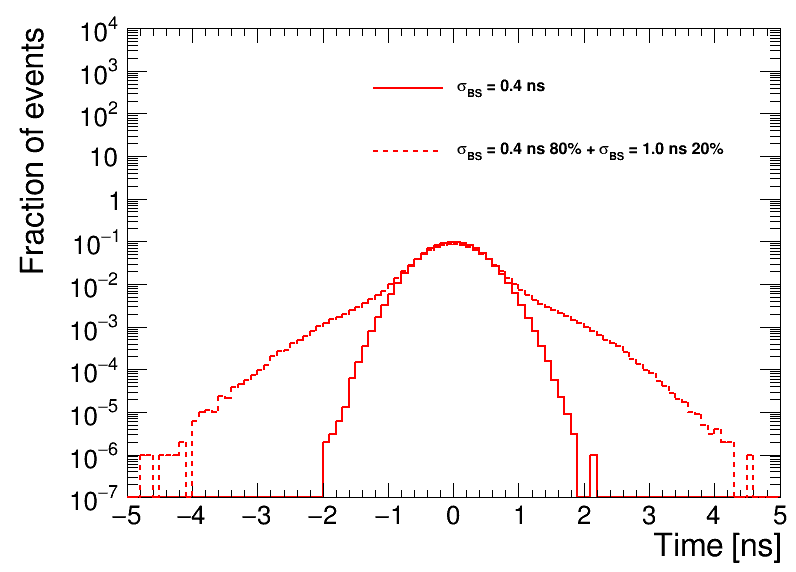

In [66]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.45,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs1 ={}
hs2 ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime1 = np.random.normal(0,sig,int(N))
    t1 = SmearTime1
    hs1[i] = create_TH1D( t1, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs1[i].SetLineColor(std_color_list[i])
    hs1[i].SetMarkerColor(std_color_list[i])
    hs1[i].GetYaxis().SetRangeUser(1e-1, 1e10)

    
    SmearTime2 = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , axis=None)
#     print(SmearTime2.shape)
#     SmearTime2 = 0.8*np.random.normal(0,sig,int(N))+0.2*np.random.normal(0,1,int(N))
    t2 = SmearTime2
    hs2[i] = create_TH1D( t2, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs2[i].SetLineStyle(7)
#     hs2[i].SetFillStyle(3436)
#     hs2[i].SetFillColor(std_color_list[i])
    hs2[i].SetLineColor(std_color_list[i])
    hs2[i].SetMarkerColor(std_color_list[i])
    hs2[i].GetYaxis().SetRangeUser(1e-1, 1e10)
    
    if i==1:

        leg.AddEntry(hs1[i],'#sigma_{BS} = '+str(sig)+' ns')

#         hs1[i].Draw('ALPsame')
        hs1[i].DrawNormalized('same')

#     if i==3:
    
        leg.AddEntry(hs2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')

#         hs2[i].Draw('LPsame')
        hs2[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_sigma400ps.png')
c.SaveAs(out_dir+'SmearTime_sigma400ps.pdf')

0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: 0.2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 1.0 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma600ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma600ps.pdf has been created


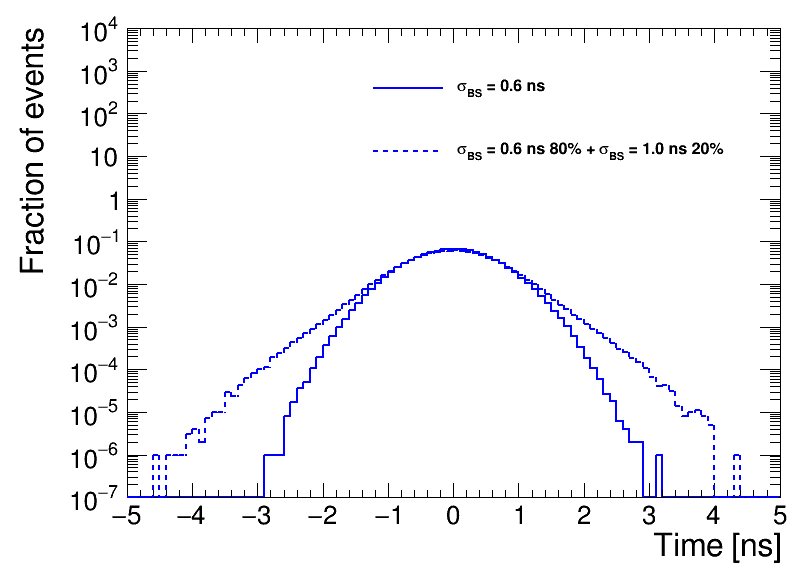

In [67]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.45,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs1 ={}
hs2 ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime1 = np.random.normal(0,sig,int(N))
    t1 = SmearTime1
    hs1[i] = create_TH1D( t1, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs1[i].SetLineColor(std_color_list[i])
    hs1[i].SetMarkerColor(std_color_list[i])
    hs1[i].GetYaxis().SetRangeUser(1e-1, 1e10)

    
    SmearTime2 = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , axis=None)
#     print(SmearTime2.shape)
#     SmearTime2 = 0.8*np.random.normal(0,sig,int(N))+0.2*np.random.normal(0,1,int(N))
    t2 = SmearTime2
    hs2[i] = create_TH1D( t2, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs2[i].SetLineStyle(7)
#     hs2[i].SetFillStyle(3436)
#     hs2[i].SetFillColor(std_color_list[i])
    hs2[i].SetLineColor(std_color_list[i])
    hs2[i].SetMarkerColor(std_color_list[i])
    hs2[i].GetYaxis().SetRangeUser(1e-1, 1e10)
    
    if i==2:

        leg.AddEntry(hs1[i],'#sigma_{BS} = '+str(sig)+' ns')

#         hs1[i].Draw('ALPsame')
        hs1[i].DrawNormalized('same')

#     if i==3:
    
        leg.AddEntry(hs2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')

#         hs2[i].Draw('LPsame')
        hs2[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_sigma600ps.png')
c.SaveAs(out_dir+'SmearTime_sigma600ps.pdf')

0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: 0.2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 1.0 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma800ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma800ps.pdf has been created


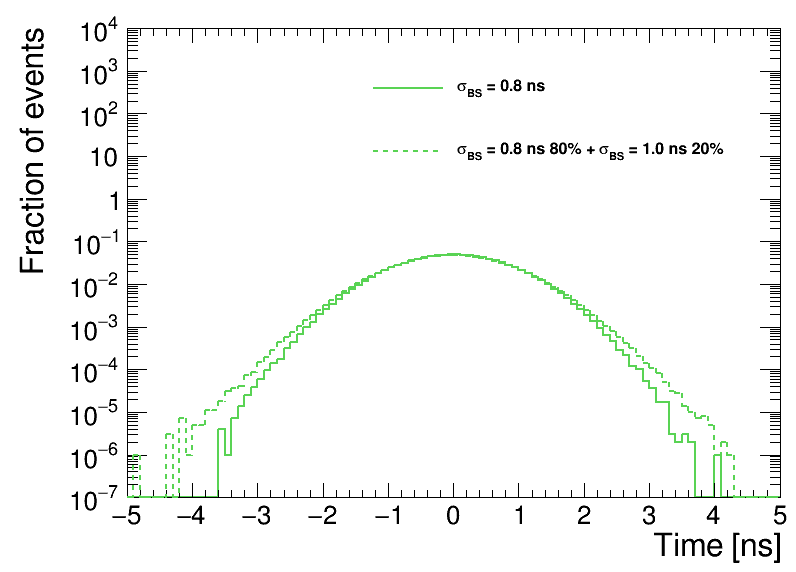

In [68]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.45,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs1 ={}
hs2 ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime1 = np.random.normal(0,sig,int(N))
    t1 = SmearTime1
    hs1[i] = create_TH1D( t1, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs1[i].SetLineColor(std_color_list[i])
    hs1[i].SetMarkerColor(std_color_list[i])
    hs1[i].GetYaxis().SetRangeUser(1e-1, 1e10)

    
    SmearTime2 = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , axis=None)
#     print(SmearTime2.shape)
#     SmearTime2 = 0.8*np.random.normal(0,sig,int(N))+0.2*np.random.normal(0,1,int(N))
    t2 = SmearTime2
    hs2[i] = create_TH1D( t2, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs2[i].SetLineStyle(7)
#     hs2[i].SetFillStyle(3436)
#     hs2[i].SetFillColor(std_color_list[i])
    hs2[i].SetLineColor(std_color_list[i])
    hs2[i].SetMarkerColor(std_color_list[i])
    hs2[i].GetYaxis().SetRangeUser(1e-1, 1e10)
    
    if i==3:

        leg.AddEntry(hs1[i],'#sigma_{BS} = '+str(sig)+' ns')

#         hs1[i].Draw('ALPsame')
        hs1[i].DrawNormalized('same')

#     if i==3:
    
        leg.AddEntry(hs2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')

#         hs2[i].Draw('LPsame')
        hs2[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_sigma800ps.png')
c.SaveAs(out_dir+'SmearTime_sigma800ps.pdf')

0 0.2
1 0.4
2 0.6
3 0.8
4 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: 0.2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0.8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 1.0 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma1ns.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/SmearTime_sigma1ns.pdf has been created


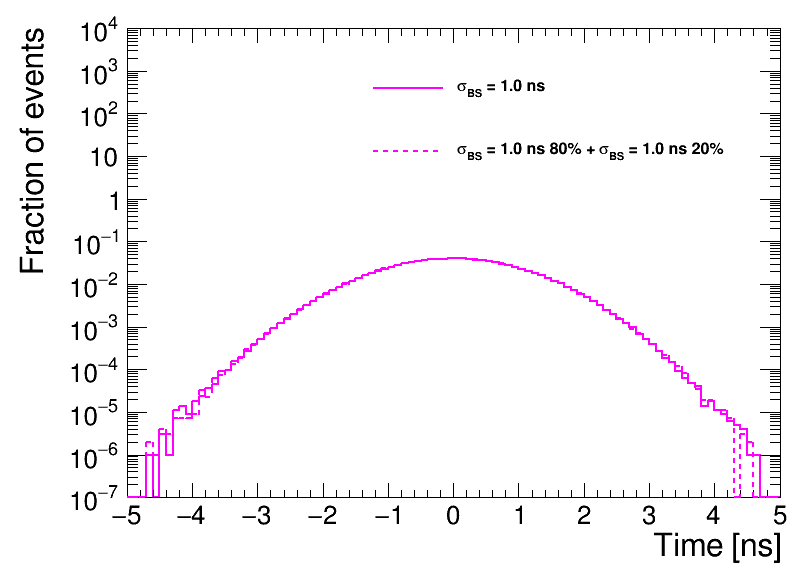

In [69]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.45,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs1 ={}
hs2 ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime1 = np.random.normal(0,sig,int(N))
    t1 = SmearTime1
    hs1[i] = create_TH1D( t1, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs1[i].SetLineColor(std_color_list[i])
    hs1[i].SetMarkerColor(std_color_list[i])
    hs1[i].GetYaxis().SetRangeUser(1e-1, 1e10)

    
    SmearTime2 = np.concatenate( (np.random.normal(0,sig,int(0.8*N)),np.random.normal(0,1,int(0.2*N))) , axis=None)
#     print(SmearTime2.shape)
#     SmearTime2 = 0.8*np.random.normal(0,sig,int(N))+0.2*np.random.normal(0,1,int(N))
    t2 = SmearTime2
    hs2[i] = create_TH1D( t2, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs2[i].SetLineStyle(7)
#     hs2[i].SetFillStyle(3436)
#     hs2[i].SetFillColor(std_color_list[i])
    hs2[i].SetLineColor(std_color_list[i])
    hs2[i].SetMarkerColor(std_color_list[i])
    hs2[i].GetYaxis().SetRangeUser(1e-1, 1e10)
    
    if i==4:

        leg.AddEntry(hs1[i],'#sigma_{BS} = '+str(sig)+' ns')

#         hs1[i].Draw('ALPsame')
        hs1[i].DrawNormalized('same')

#     if i==3:
    
        leg.AddEntry(hs2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')

#         hs2[i].Draw('LPsame')
        hs2[i].DrawNormalized('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_sigma1ns.png')
c.SaveAs(out_dir+'SmearTime_sigma1ns.pdf')

# Rejection Power Plots

4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime200ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime200ps.pdf has been created


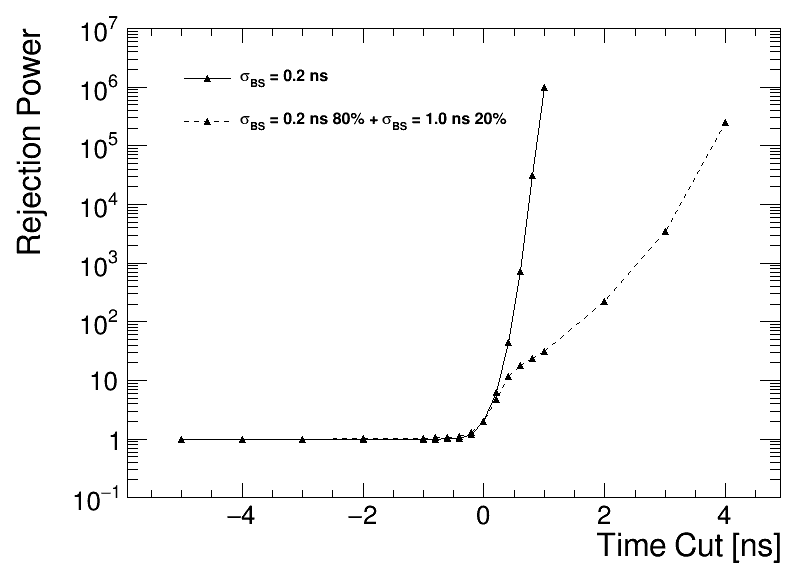

In [80]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej1 = {}
hrej2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 
    Power_i_v2 = Power_1j_v2[i] 

 
    power1 = np.array(Power_i) 
    power2 = np.array(Power_i_v2) 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
#     num = len(t_cuts)+i-4
    hrej1[i] = rt.TGraph(num1 , t_cuts, power1)

    hrej1[i].SetLineColor(std_color_list[i])
    hrej1[i].SetMarkerColor(std_color_list[i])
    hrej1[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)

    hrej2[i] = rt.TGraph(num2 , t_cuts, power2)

    hrej2[i].SetLineStyle(7)
    hrej2[i].SetLineColor(std_color_list[i])
    hrej2[i].SetMarkerColor(std_color_list[i])
    hrej2[i].SetMarkerStyle(22+i)

    leg.SetBorderSize(0)

    hrej1[i].SetTitle( 'Rejection Power' )
    hrej1[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej1[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej1[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    hrej2[i].SetTitle( 'Rejection Power' )
    hrej2[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej2[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej2[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    
    if i==0 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej2[i].Draw('ALPsame')
        hrej1[i].Draw('LPsame')
        leg.AddEntry(hrej1[i],'#sigma_{BS} = '+str(sig)+' ns')
        leg.AddEntry(hrej2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')




leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime200ps.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime200ps.pdf')


4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime400ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime400ps.pdf has been created


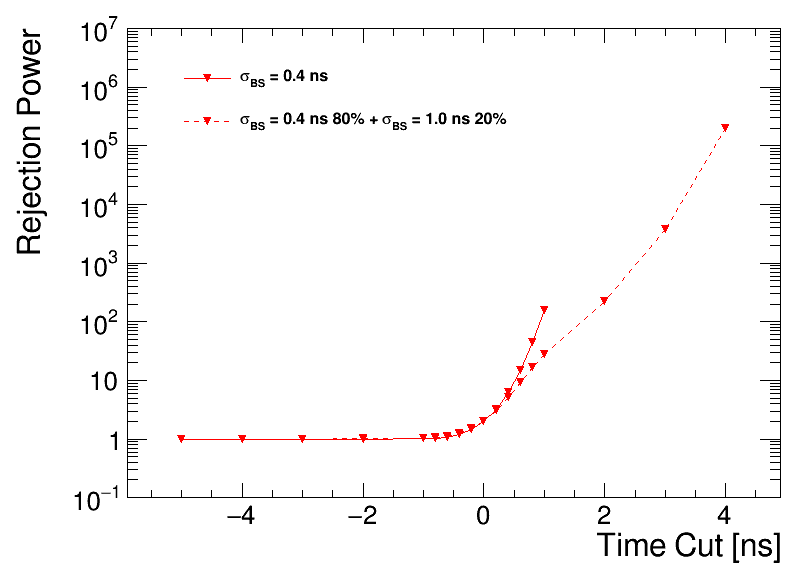

In [82]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej1 = {}
hrej2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 
    Power_i_v2 = Power_1j_v2[i] 

 
    power1 = np.array(Power_i) 
    power2 = np.array(Power_i_v2) 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
#     num = len(t_cuts)+i-4
    hrej1[i] = rt.TGraph(num1 , t_cuts, power1)

    hrej1[i].SetLineColor(std_color_list[i])
    hrej1[i].SetMarkerColor(std_color_list[i])
    hrej1[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)

    hrej2[i] = rt.TGraph(num2 , t_cuts, power2)

    hrej2[i].SetLineStyle(7)
    hrej2[i].SetLineColor(std_color_list[i])
    hrej2[i].SetMarkerColor(std_color_list[i])
    hrej2[i].SetMarkerStyle(22+i)

    leg.SetBorderSize(0)

    hrej1[i].SetTitle( 'Rejection Power' )
    hrej1[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej1[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej1[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    hrej2[i].SetTitle( 'Rejection Power' )
    hrej2[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej2[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej2[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    
    if i==1 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej2[i].Draw('ALPsame')
        hrej1[i].Draw('LPsame')
        leg.AddEntry(hrej1[i],'#sigma_{BS} = '+str(sig)+' ns')
        leg.AddEntry(hrej2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')




leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime400ps.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime400ps.pdf')


4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime600ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime600ps.pdf has been created


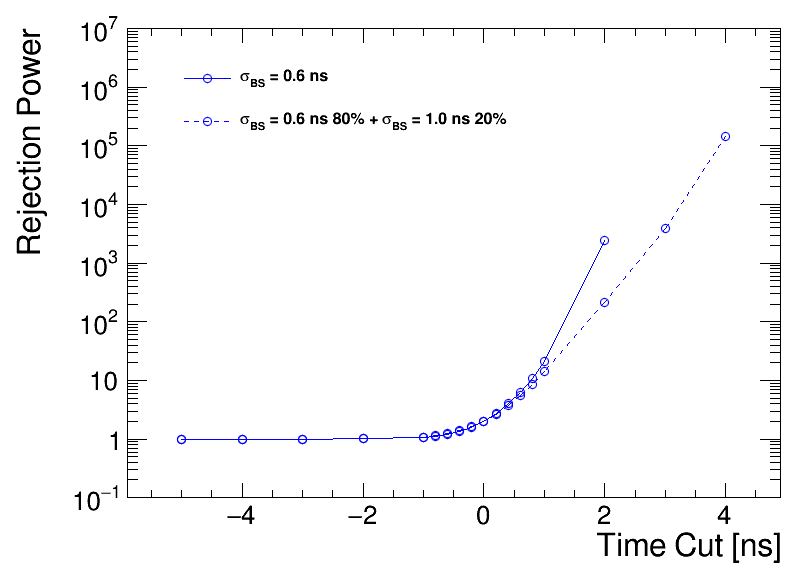

In [83]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej1 = {}
hrej2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 
    Power_i_v2 = Power_1j_v2[i] 

 
    power1 = np.array(Power_i) 
    power2 = np.array(Power_i_v2) 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
#     num = len(t_cuts)+i-4
    hrej1[i] = rt.TGraph(num1 , t_cuts, power1)

    hrej1[i].SetLineColor(std_color_list[i])
    hrej1[i].SetMarkerColor(std_color_list[i])
    hrej1[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)

    hrej2[i] = rt.TGraph(num2 , t_cuts, power2)

    hrej2[i].SetLineStyle(7)
    hrej2[i].SetLineColor(std_color_list[i])
    hrej2[i].SetMarkerColor(std_color_list[i])
    hrej2[i].SetMarkerStyle(22+i)

    leg.SetBorderSize(0)

    hrej1[i].SetTitle( 'Rejection Power' )
    hrej1[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej1[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej1[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    hrej2[i].SetTitle( 'Rejection Power' )
    hrej2[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej2[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej2[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    
    if i==2 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej2[i].Draw('ALPsame')
        hrej1[i].Draw('LPsame')
        leg.AddEntry(hrej1[i],'#sigma_{BS} = '+str(sig)+' ns')
        leg.AddEntry(hrej2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')




leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime600ps.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime600ps.pdf')


4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime800ps.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime800ps.pdf has been created


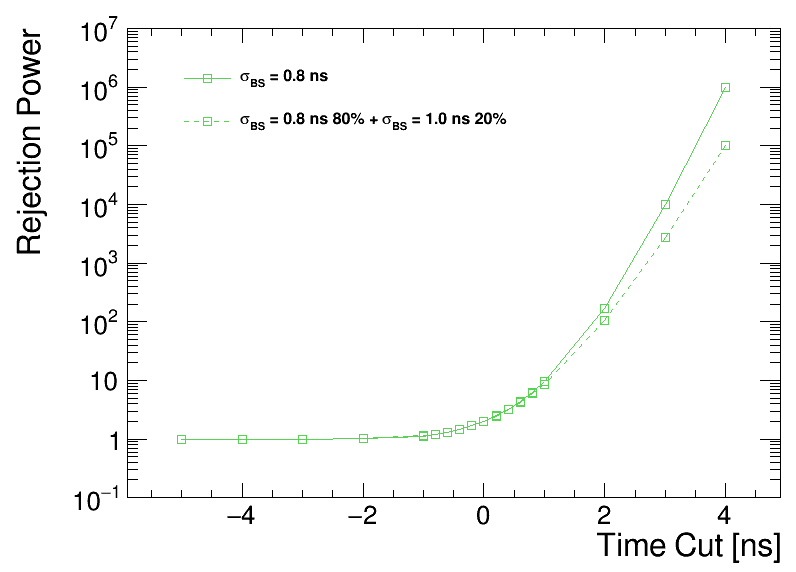

In [84]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej1 = {}
hrej2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 
    Power_i_v2 = Power_1j_v2[i] 

 
    power1 = np.array(Power_i) 
    power2 = np.array(Power_i_v2) 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
#     num = len(t_cuts)+i-4
    hrej1[i] = rt.TGraph(num1 , t_cuts, power1)

    hrej1[i].SetLineColor(std_color_list[i])
    hrej1[i].SetMarkerColor(std_color_list[i])
    hrej1[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)

    hrej2[i] = rt.TGraph(num2 , t_cuts, power2)

    hrej2[i].SetLineStyle(7)
    hrej2[i].SetLineColor(std_color_list[i])
    hrej2[i].SetMarkerColor(std_color_list[i])
    hrej2[i].SetMarkerStyle(22+i)

    leg.SetBorderSize(0)

    hrej1[i].SetTitle( 'Rejection Power' )
    hrej1[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej1[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej1[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    hrej2[i].SetTitle( 'Rejection Power' )
    hrej2[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej2[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej2[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    
    if i==3 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej2[i].Draw('ALPsame')
        hrej1[i].Draw('LPsame')
        leg.AddEntry(hrej1[i],'#sigma_{BS} = '+str(sig)+' ns')
        leg.AddEntry(hrej2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')




leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime800ps.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime800ps.pdf')


4 1.0
3 0.8
2 0.6
1 0.4
0 0.2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime1ns.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/RejectionPower_SmearTime1ns.pdf has been created


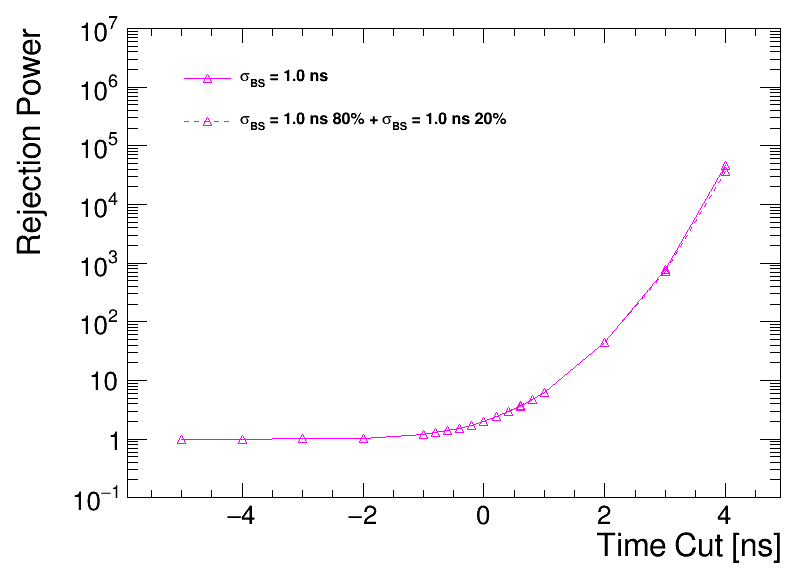

In [85]:
#make plot
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.22,0.75,0.55,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

hrej1 = {}
hrej2 = {}
t_cuts = np.array(t_cuts) 
num = len(t_cuts)


# sigma = [0.2,0.4,0.6,0.8,1.]

for i,sig in reversed(list(enumerate(sigma))):   
    print(i, sig)

    Power_i = Power_1j[i] 
    Power_i_v2 = Power_1j_v2[i] 

 
    power1 = np.array(Power_i) 
    power2 = np.array(Power_i_v2) 
    #print num, t_cuts, power
    num1 = len(power1)
    num2 = len(power2)
#     num = len(t_cuts)+i-4
    hrej1[i] = rt.TGraph(num1 , t_cuts, power1)

    hrej1[i].SetLineColor(std_color_list[i])
    hrej1[i].SetMarkerColor(std_color_list[i])
    hrej1[i].SetMarkerStyle(22+i)
    #     hrej[m].SetMarkerSize(2)

    hrej2[i] = rt.TGraph(num2 , t_cuts, power2)

    hrej2[i].SetLineStyle(7)
    hrej2[i].SetLineColor(std_color_list[i])
    hrej2[i].SetMarkerColor(std_color_list[i])
    hrej2[i].SetMarkerStyle(22+i)

    leg.SetBorderSize(0)

    hrej1[i].SetTitle( 'Rejection Power' )
    hrej1[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej1[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej1[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    hrej2[i].SetTitle( 'Rejection Power' )
    hrej2[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
    #hrej[m].GetXaxis().SetRangeUser(-10,10)
    hrej2[i].GetYaxis().SetRangeUser(1e-1,1e7)
#     hrej[i].GetXaxis().SetRangeUser(-6,6)
    hrej2[i].GetYaxis().SetTitle( 'Rejection Power' )
    
    
    if i==4 :
#         hrej[i].GetXaxis().SetRange(-6,6)
        hrej2[i].Draw('ALPsame')
        hrej1[i].Draw('LPsame')
        leg.AddEntry(hrej1[i],'#sigma_{BS} = '+str(sig)+' ns')
        leg.AddEntry(hrej2[i],'#sigma_{BS} = '+str(sig)+' ns 80% + #sigma_{BS} = 1.0 ns 20%')




leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'RejectionPower_SmearTime1ns.png')
c.SaveAs(out_dir+'RejectionPower_SmearTime1ns.pdf')


# Fit QCD BKG Sample

In [3]:

directory = '/mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v2/bkg/QCD_HT500to700_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/'
 
#name_string = 'QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
name_string1 = 'QCD_'
name_string2 = '_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

HT = 'HT500to700'
# HT = 'HT50toInf'

fpath = directory + name_string1 + HT + name_string2
print (HT, fpath)
    
print ('File ready')
 

root_dir = uproot.open(fpath) 
print ('Open ready')

tree = root_dir['JetTimingTree']
print ('Tree ready')



HT500to700 /mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v2/bkg/QCD_HT500to700_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/QCD_HT500to700_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root
File ready
Open ready
Tree ready


 FCN=1.49479e+06 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=3.73962e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93247e+04   1.92316e+00   8.58884e-01   1.65450e-05
   2  Mean        -1.08846e-01   2.97889e-05   1.77733e-05   1.36731e-01
   3  Sigma        3.83893e-01   2.75157e-05   1.08214e-05   1.41089e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/JetTime_all_fit.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/JetTime_all_fit.pdf has been created


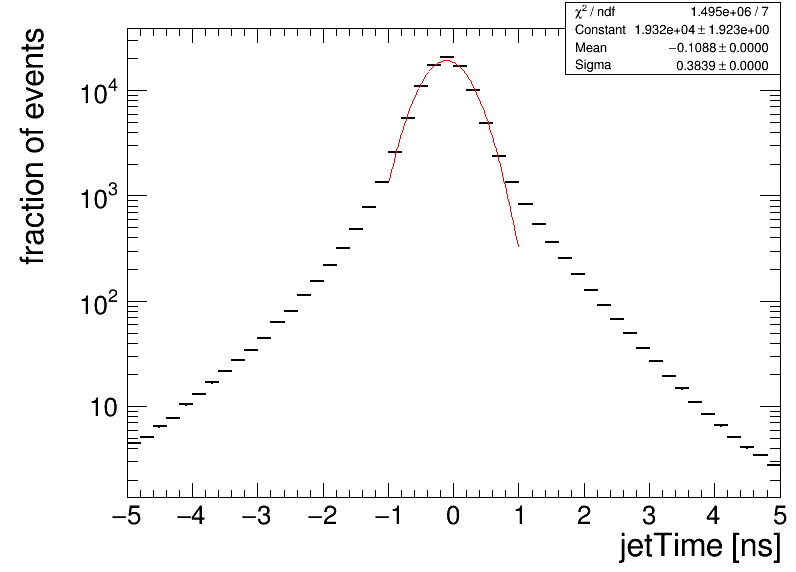

In [7]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
ht.Fit('gaus','','',-1,1)

# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all_fit.png')
c.SaveAs(out_dir+'JetTime_all_fit.pdf')

 FCN=1.49479e+06 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=3.73962e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93247e+04   1.92316e+00   8.58884e-01   1.65450e-05
   2  Mean        -1.08846e-01   2.97889e-05   1.77733e-05   1.36731e-01
   3  Sigma        3.83893e-01   2.75157e-05   1.08214e-05   1.41089e+00
 FCN=8.09687e+06 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=7.15424e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.85278e+04   1.92355e+00   1.89673e+00  -1.16579e-05
   2  Mean        -1.13019e-01   2.97852e-05   4.13832e-05   5.52128e+00
   3  Sigma        4.0423

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/JetTime_all_fit2.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190606/JetTime_all_fit2.pdf has been created


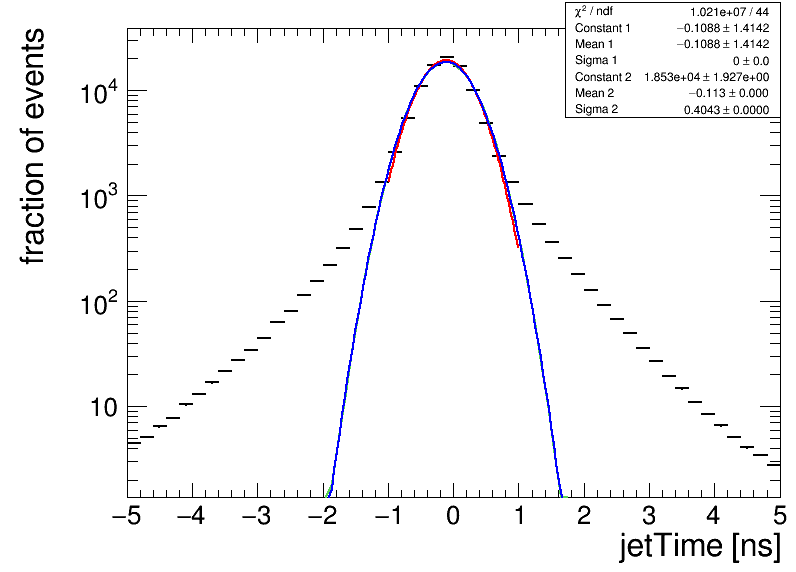

In [9]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
# ht.Fit('gaus','','',-1,1)

g1 = rt.TF1('m1','gaus',-1,1)
g1.SetLineWidth(2)
g1.SetLineColor(std_color_list[i+1])
g2 = rt.TF1('m2','gaus',-2,2)
g2.SetLineWidth(2)
g2.SetLineColor(std_color_list[i+2])

f1 = rt.TF1("double_gaus", "gaus(0) + gaus(3)", -10, 10);
f1.SetParNames("Constant 1", "Mean 1", "Sigma 1","Constant 2", "Mean 2", "Sigma 2");
f1.SetLineWidth(2)
f1.SetLineColor(std_color_list[i+3])

ht.Fit(g1, "R")
g2.SetParameter(2,1.0)
ht.Fit(g2, "R")
    
f1.SetParameter(0,g1.GetParameter(1))
f1.SetParameter(1,g1.GetParameter(1))
# f1.SetParameter(2,g1.GetParameter(2))
# f1.SetParameter(3,g2.GetParameter(1))
# f1.SetParameter(4,g1.GetParameter(1))
# f1.SetParameter(4,g2.GetParameter(1))
f1.SetParameter(5,0.8)
# f1.SetParameter(5,g2.GetParameter(2))
# print(g1.GetParameter(1))

    
ht.Fit(f1,'R')  
f1.Draw('Lsame')
g1.Draw('Lsame')
g2.Draw('Lsame')

# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all_fit2.png')
c.SaveAs(out_dir+'JetTime_all_fit2.pdf')

 FCN=1.49479e+06 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=3.73962e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93247e+04   1.92316e+00   8.58884e-01   1.65450e-05
   2  Mean        -1.08846e-01   2.97889e-05   1.77733e-05   1.36731e-01
   3  Sigma        3.83893e-01   2.75157e-05   1.08214e-05   1.41089e+00
 FCN=10886.8 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.77524e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.65649e+00   1.70182e-03   2.28765e-05  -7.93753e-02
   2  Slope       -1.80663e+00   1.09128e-03   1.46694e-05  -9.92193e-02
 FCN=429.267 FROM MIGRAD    S

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190606/JetTime_all_fit_gausexp.png has been created


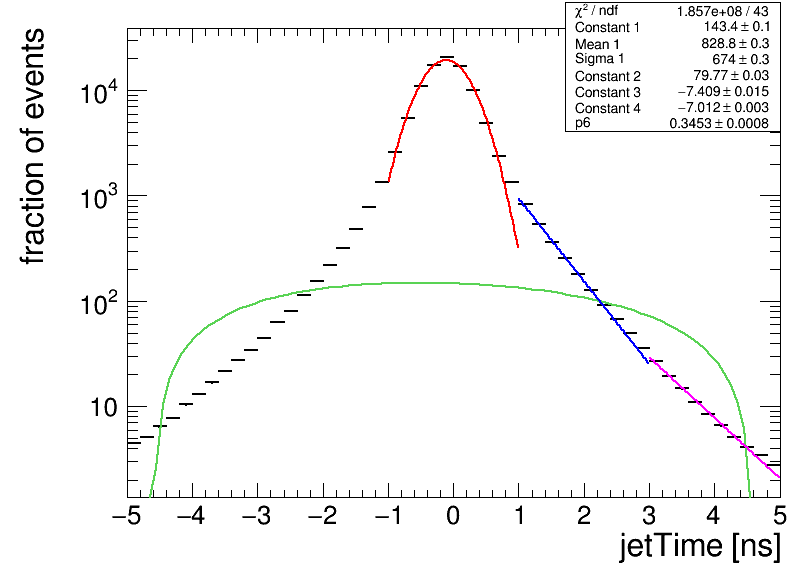

In [18]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
# ht.Fit('gaus','','',-1,1)

g1 = rt.TF1('m1','gaus',-1,1)
g1.SetLineWidth(2)
g1.SetLineColor(std_color_list[i+1])
g2 = rt.TF1('e2','expo',1,3)
g2.SetLineWidth(2)
g2.SetLineColor(std_color_list[i+2])
g3 = rt.TF1('e3','expo',3,5)
g3.SetLineWidth(2)
g3.SetLineColor(std_color_list[i+4])

f1 = rt.TF1("double_gaus", "gaus(0) + pol3(3)", -10, 10);
f1.SetParNames("Constant 1", "Mean 1", "Sigma 1","Constant 2", "Constant 3", "Constant 4");
f1.SetLineWidth(2)
f1.SetLineColor(std_color_list[i+3])

ht.Fit(g1, "R")
# g2.SetParameter(2,1.0)
ht.Fit(g2, "R")
ht.Fit(g3, "R")
    
f1.SetParameter(0,g1.GetParameter(1))
f1.SetParameter(1,g1.GetParameter(1))
f1.SetParameter(2,g1.GetParameter(2))
# f1.SetParameter(3,g2.GetParameter(1))
# f1.SetParameter(4,g1.GetParameter(1))
# f1.SetParameter(4,g2.GetParameter(1))
# f1.SetParameter(5,0.8)
# f1.SetParameter(5,g2.GetParameter(2))
# print(g1.GetParameter(1))

    
ht.Fit(f1,'R')  
f1.Draw('Lsame')
g1.Draw('Lsame')
g2.Draw('Lsame')
g3.Draw('Lsame')

# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all_fit_gausexp.png')
# c.SaveAs(out_dir+'JetTime_all_gausexp.pdf')

In [33]:
def bw_func(x, par): 
    dm = x[0] - par[1]
    func = par[0]/(dm*dm+par[2]*par[2])
    return func 

 FCN=1.49479e+06 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=3.73962e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93247e+04   1.92316e+00   8.58884e-01   1.65450e-05
   2  Mean        -1.08846e-01   2.97889e-05   1.77733e-05   1.36731e-01
   3  Sigma        3.83893e-01   2.75157e-05   1.08214e-05   1.41089e+00
 FCN=10886.8 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.77524e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.65649e+00   1.70182e-03   2.28765e-05  -7.93753e-02
   2  Slope       -1.80663e+00   1.09128e-03   1.46694e-05  -9.92193e-02
 FCN=429.267 FROM MIGRAD    S

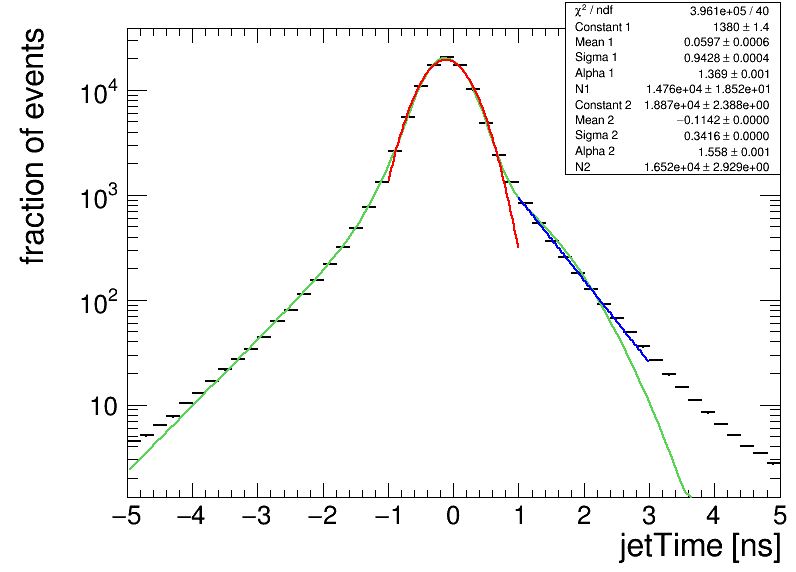

In [44]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
# ht.Fit('gaus','','',-1,1)

g1 = rt.TF1('m1','gaus',-1,1)
g1.SetLineWidth(2)
g1.SetLineColor(std_color_list[i+1])
g2 = rt.TF1('e2','expo',1,3)
g2.SetLineWidth(2)
g2.SetLineColor(std_color_list[i+2])
# g3 = rt.TF1('e3','expo',3,5)
# g3.SetLineWidth(2)
# g3.SetLineColor(std_color_list[i+4])
g4 = rt.TF1("bw","[0]/(pow(x-[1],2)+pow([2],2))", -5, 5);
g4.SetLineWidth(2)
g4.SetLineColor(std_color_list[i+5])

# f1 = rt.TF1("double_gaus", "gaus(0) + [3]*exp([4]+[5]*x)", -1, 3);
# f1 = rt.TF1("bw+gaus","[0]/(pow(x-[1],2)+pow([2],2))+gaus(3)", -5, 5);
f1 = rt.TF1("cb","crystalball(0)+crystalball(5)", -5, 5);
f1.SetParNames("Constant 1", "Mean 1", "Sigma 1", "Alpha 1", "N1", "Constant 2","Mean 2", "Sigma 2", "Alpha 2", "N2");
# f1.SetParNames("Constant 1", "Mean 1", "Sigma 1","Constant 2", "Exp Constant", "Exp slope");
f1.SetLineWidth(2)
f1.SetLineColor(std_color_list[i+3])

ht.Fit(g1, "R")
# g2.SetParameter(2,1.0)
ht.Fit(g2, "R")
# ht.Fit(g3, "R")
ht.Fit(g3, "R")


#mean
f1.SetParameter(1,g1.GetParameter(1))
f1.SetParameter(6,g1.GetParameter(1))
#sigma
f1.SetParameter(2,g1.GetParameter(2))
f1.SetParameter(7,g1.GetParameter(2))
#alpha
f1.SetParameter(3,1)
f1.SetParameter(8,1)
#N
f1.SetParameter(4,g1.GetParameter(0))
f1.SetParameter(9,g1.GetParameter(0))


# f1.SetParameter(1,g1.GetParameter(1))
# f1.SetParameter(2,g1.GetParameter(2))
# f1.SetParameter(5,g2.GetParameter(1))
# f1.SetParameter(3,g2.GetParameter(1))
# f1.SetParameter(4,g1.GetParameter(1))
# f1.SetParameter(4,g2.GetParameter(1))
# f1.SetParameter(5,0.8)
# f1.SetParameter(5,g2.GetParameter(2))
# print(g1.GetParameter(1))

    
ht.Fit(f1,'R')  
f1.Draw('Lsame')
g1.Draw('Lsame')
g2.Draw('Lsame')
# g3.Draw('Lsame')
g4.Draw('Lsame')

# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all_fit_gausexp.png')
# c.SaveAs(out_dir+'JetTime_all_gausexp.pdf')

 FCN=1.49479e+06 FROM MIGRAD    STATUS=CONVERGED      85 CALLS          86 TOTAL
                     EDM=3.73962e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93247e+04   1.92316e+00   8.58884e-01   1.65450e-05
   2  Mean        -1.08846e-01   2.97889e-05   1.77733e-05   1.36731e-01
   3  Sigma        3.83893e-01   2.75157e-05   1.08214e-05   1.41089e+00
 FCN=10886.8 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.77524e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.65649e+00   1.70182e-03   2.28765e-05  -7.93753e-02
   2  Slope       -1.80663e+00   1.09128e-03   1.46694e-05  -9.92193e-02
 FCN=429.267 FROM MIGRAD    S

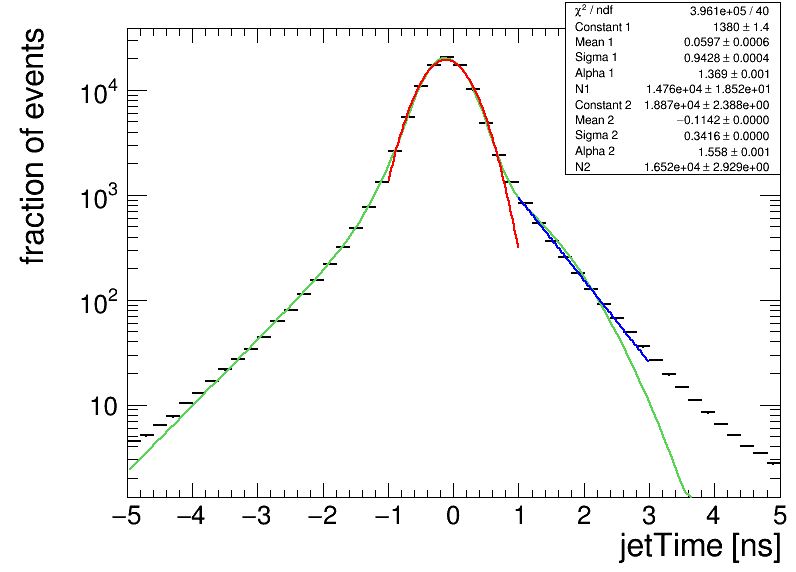

In [44]:
# plot all jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

jetTime = tree['jetTime'].array()
weight = tree['weight'].array()
sizes = [len(x) for x in jetTime]
t = jetTime.flatten()
flat_weight = []
for j, (n, val) in enumerate(zip(sizes, weight)):
    #print n
    #print val
    #print n*[val]
    flat_weight += n*[val]
    #print flat_weight[k]
flat_weight = np.array(flat_weight)
ht = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=HT, binning=[50,-5,5], weights = flat_weight)
ht.SetLineColor(std_color_list[i])
ht.SetMarkerColor(std_color_list[i])


leg.AddEntry(ht,HT)
leg.SetBorderSize(0)
#h[k].GetYaxis().SetRangeUser(0,500)
 
ht.DrawNormalized('')
# ht.Fit('gaus','','',-1,1)

g1 = rt.TF1('m1','gaus',-1,1)
g1.SetLineWidth(2)
g1.SetLineColor(std_color_list[i+1])
g2 = rt.TF1('e2','expo',1,3)
g2.SetLineWidth(2)
g2.SetLineColor(std_color_list[i+2])
# g3 = rt.TF1('e3','expo',3,5)
# g3.SetLineWidth(2)
# g3.SetLineColor(std_color_list[i+4])
g4 = rt.TF1("bw","[0]/(pow(x-[1],2)+pow([2],2))", -5, 5);
g4.SetLineWidth(2)
g4.SetLineColor(std_color_list[i+5])

# f1 = rt.TF1("double_gaus", "gaus(0) + [3]*exp([4]+[5]*x)", -1, 3);
# f1 = rt.TF1("bw+gaus","[0]/(pow(x-[1],2)+pow([2],2))+gaus(3)", -5, 5);
f1 = rt.TF1("cb","crystalball(0)+crystalball(5)", -5, 5)
f1.SetParNames("Constant 1", "Mean 1", "Sigma 1", "Alpha 1", "N1", "Constant 2","Mean 2", "Sigma 2", "Alpha 2", "N2")
# f1.SetParNames("Constant 1", "Mean 1", "Sigma 1","Constant 2", "Exp Constant", "Exp slope");
f1.SetLineWidth(2)
f1.SetLineColor(std_color_list[i+3])

ht.Fit(g1, "R")
# g2.SetParameter(2,1.0)
ht.Fit(g2, "R")
# ht.Fit(g3, "R")
ht.Fit(g3, "R")


#mean
f1.SetParameter(1,g1.GetParameter(1))
f1.SetParameter(6,g1.GetParameter(1))
#sigma
f1.SetParameter(2,g1.GetParameter(2))
f1.SetParameter(7,g1.GetParameter(2))
#alpha
f1.SetParameter(3,1)
f1.SetParameter(8,1)
#N
f1.SetParameter(4,g1.GetParameter(0))
f1.SetParameter(9,g1.GetParameter(0))


# f1.SetParameter(1,g1.GetParameter(1))
# f1.SetParameter(2,g1.GetParameter(2))
# f1.SetParameter(5,g2.GetParameter(1))
# f1.SetParameter(3,g2.GetParameter(1))
# f1.SetParameter(4,g1.GetParameter(1))
# f1.SetParameter(4,g2.GetParameter(1))
# f1.SetParameter(5,0.8)
# f1.SetParameter(5,g2.GetParameter(2))
# print(g1.GetParameter(1))

    
ht.Fit(f1,'R')  
f1.Draw('Lsame')
g1.Draw('Lsame')
g2.Draw('Lsame')
# g3.Draw('Lsame')
g4.Draw('Lsame')

# leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs(out_dir+'JetTime_all_fit_dcb.png')
# c.SaveAs(out_dir+'JetTime_all_gausexp.pdf')

# Double Crystal Ball Function

In [64]:
def bw_func(x,par):
#     dm = x - par[1]
    a = par[0]
    b = par[1]
    c = par[2]
    func = a*x*x  + b*x + c
#     func = "par[0]/([1]*x+[2]*[2])"
    return func 

In [68]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.75,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

sigma = [0.2,0.4,0.6,0.8,1.]

hs ={}
for i,sig in enumerate(sigma):   
    print(i, sig)

    SmearTime = np.random.normal(0,sig,100000)
    t = SmearTime
    hs[i] = create_TH1D( t, axis_title=['Time [ns]', 'Fraction of events'], name=str(sig), binning=[100,-5,5])
    hs[i].SetLineColor(std_color_list[i])
    hs[i].SetMarkerColor(std_color_list[i])
    hs[i].GetYaxis().SetRangeUser(1e-1, 1e7)


    leg.AddEntry(hs[i],'#sigma_{BS} = '+str(sig)+' ns')

    hs[i].DrawNormalized('same')
#     bw_func1 = bw_func(x,3,par)
    f1 = rt.TF1("cb",bw_func, -5, 5,3);
    
    hs[i].Fit(f1)
#     f1.Draw('same')
    
#     i += 1

# leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

# leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SmearTime_Test.png')
c.SaveAs(out_dir+'SmearTime_Test.pdf')

0 0.2


TypeError: bw_func() missing 1 required positional argument: 'apar'

TypeError: none of the 2 overloaded methods succeeded. Full details:
  TFitResultPtr TH1::Fit(const char* formula, const char* option = "", const char* goption = "", double xmin = 0, double xmax = 0) =>
    could not convert argument 1 (bad argument type for built-in operation)
  TFitResultPtr TH1::Fit(TF1* f1, const char* option = "", const char* goption = "", double xmin = 0, double xmax = 0) =>
    TFN python function call failed (C++ exception of type runtime_error)

In [39]:
define crystalball_function(double x, double alpha, double n, double sigma, double mean) {
  // evaluate the crystal ball function
  if (sigma < 0.)     return 0.;
  double z = (x - mean)/sigma; 
  if (alpha < 0) z = -z; 
  double abs_alpha = std::abs(alpha);
  // double C = n/abs_alpha * 1./(n-1.) * std::exp(-alpha*alpha/2.);
  // double D = std::sqrt(M_PI/2.)*(1.+ROOT::Math::erf(abs_alpha/std::sqrt(2.)));
  // double N = 1./(sigma*(C+D));
  if (z  > - abs_alpha)
    return std::exp(- 0.5 * z * z);
  else {
    //double A = std::pow(n/abs_alpha,n) * std::exp(-0.5*abs_alpha*abs_alpha);
    double nDivAlpha = n/abs_alpha;
    double AA =  std::exp(-0.5*abs_alpha*abs_alpha);
    double B = nDivAlpha -abs_alpha;
    double arg = nDivAlpha/(B-z);
    return AA * std::pow(arg,n);
  }
}

double crystalball_function(const double *x, const double *p) {
  // if ((!x) || (!p)) return 0.; // just a precaution
  // [Constant] * ROOT::Math::crystalball_function(x, [Alpha], [N], [Sigma], [Mean])
  return (p[0] * crystalball_function(x[0], p[3], p[4], p[2], p[1]));
}


SyntaxError: invalid syntax (<ipython-input-39-105b7bc71517>, line 1)